In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lombardia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,3,Lombardia,4118,426,4544,61797,66341,2627,3529,...,37.0,37251.0,13253.0,2580.0,9.38,6.85,9.47,26.63,-2.07,4.12
370,2021-03-01T17:00:00,3,Lombardia,4224,441,4665,60337,65002,-1339,2135,...,42.0,20571.0,7581.0,-1460.0,9.45,7.18,10.38,28.16,3.52,-2.02
371,2021-03-02T17:00:00,3,Lombardia,4408,476,4884,62806,67690,2688,3762,...,55.0,42052.0,10113.0,2469.0,9.75,7.22,8.95,37.20,7.94,4.14
372,2021-03-03T17:00:00,3,Lombardia,4545,506,5051,64285,69336,1646,4590,...,60.0,55611.0,14251.0,1479.0,10.02,7.28,8.25,32.21,6.30,2.43


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 5174
Nuovi tamponi: 53563.0
Percentuale nuovi positivi/nuovi tamponi: 9.700000000000001 %
Nuovi guariti: 2057.0
Nuovi deceduti: 59.0
Variazione positivi ricoverati con sintomi: 190.0
Variazione positivi in terapia intensiva: 26.0
Variazione positivi in isolamento dimiciliare: 2842.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,3,Lombardia,3267,489,3756,53199,56955,945,1709,...,36.0,13209.0,5215.0,973.0,13.02,6.59,12.94,32.77,-0.41,1.69
1,2021-01-04T17:00:00,3,Lombardia,3227,484,3711,48976,52687,-4268,863,...,27.0,8161.0,3029.0,-4223.0,13.04,7.04,10.57,28.49,-1.02,-7.49
2,2021-01-05T17:00:00,3,Lombardia,3344,475,3819,48498,52317,-370,1338,...,62.0,12790.0,4611.0,-478.0,12.44,7.30,10.46,29.02,-1.86,-0.70
3,2021-01-06T17:00:00,3,Lombardia,3424,471,3895,48796,52691,374,2952,...,92.0,28462.0,8833.0,298.0,12.09,7.39,10.37,33.42,-0.84,0.71
4,2021-01-07T17:00:00,3,Lombardia,3363,473,3836,50406,54242,1551,2799,...,34.0,20331.0,7522.0,1610.0,12.33,7.07,13.77,37.21,0.42,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,3,Lombardia,4118,426,4544,61797,66341,2627,3529,...,37.0,37251.0,13253.0,2580.0,9.38,6.85,9.47,26.63,-2.07,4.12
57,2021-03-01T17:00:00,3,Lombardia,4224,441,4665,60337,65002,-1339,2135,...,42.0,20571.0,7581.0,-1460.0,9.45,7.18,10.38,28.16,3.52,-2.02
58,2021-03-02T17:00:00,3,Lombardia,4408,476,4884,62806,67690,2688,3762,...,55.0,42052.0,10113.0,2469.0,9.75,7.22,8.95,37.20,7.94,4.14
59,2021-03-03T17:00:00,3,Lombardia,4545,506,5051,64285,69336,1646,4590,...,60.0,55611.0,14251.0,1479.0,10.02,7.28,8.25,32.21,6.30,2.43


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

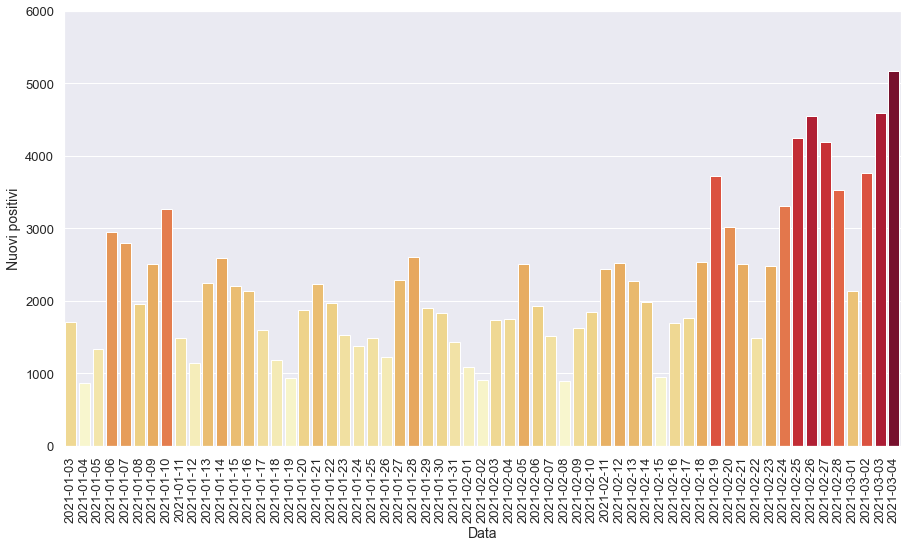

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

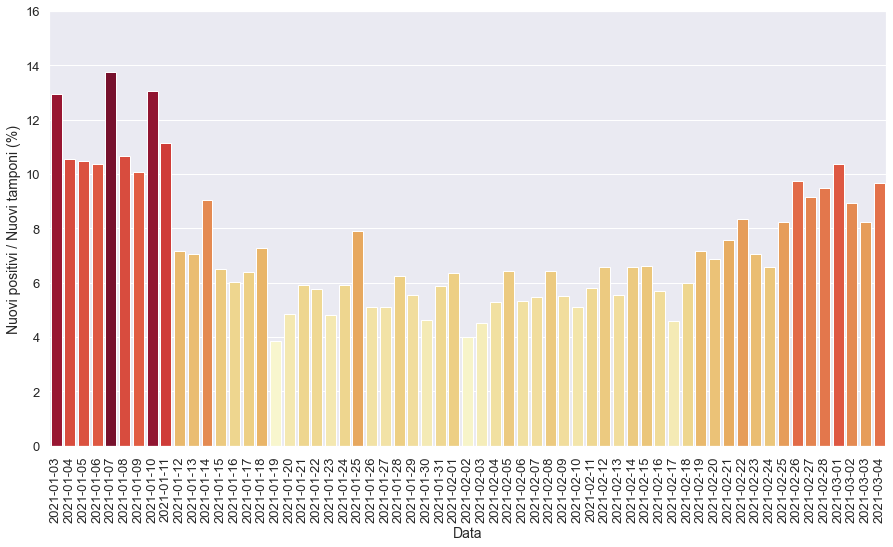

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

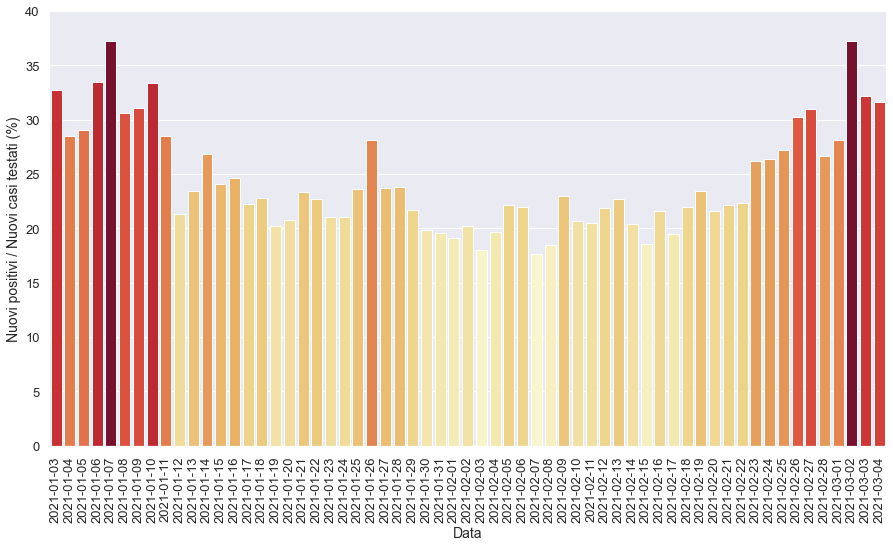

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

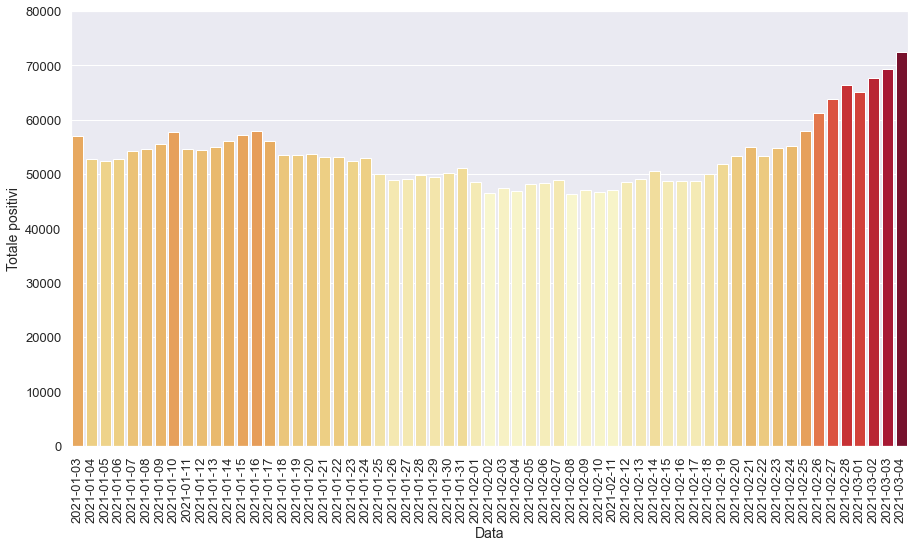

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

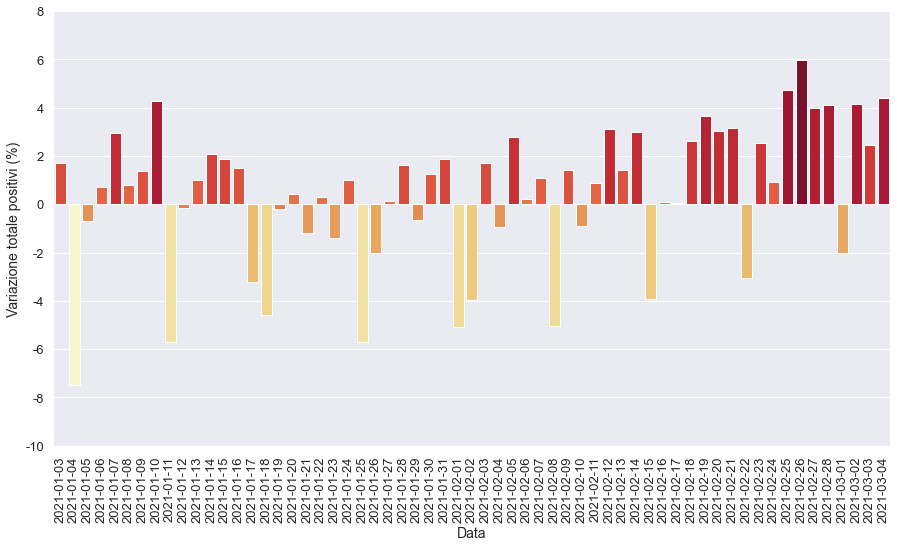

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

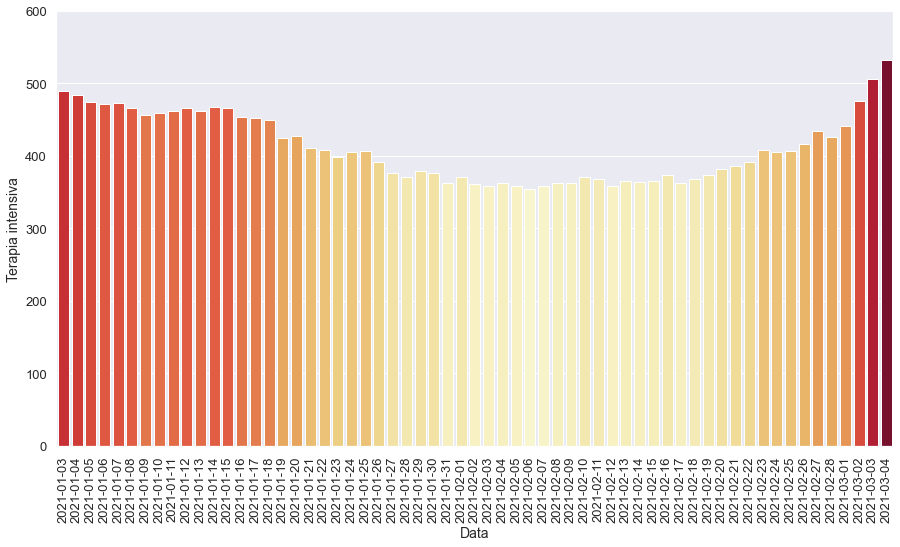

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

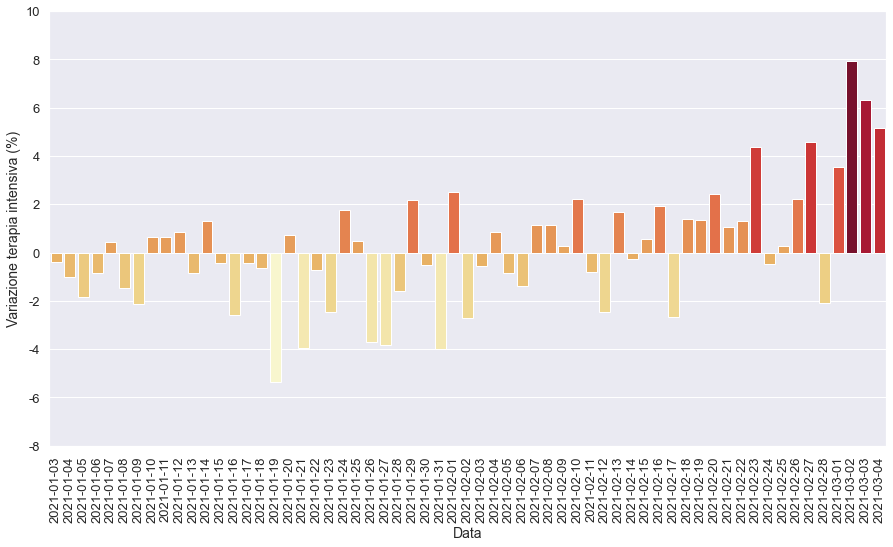

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

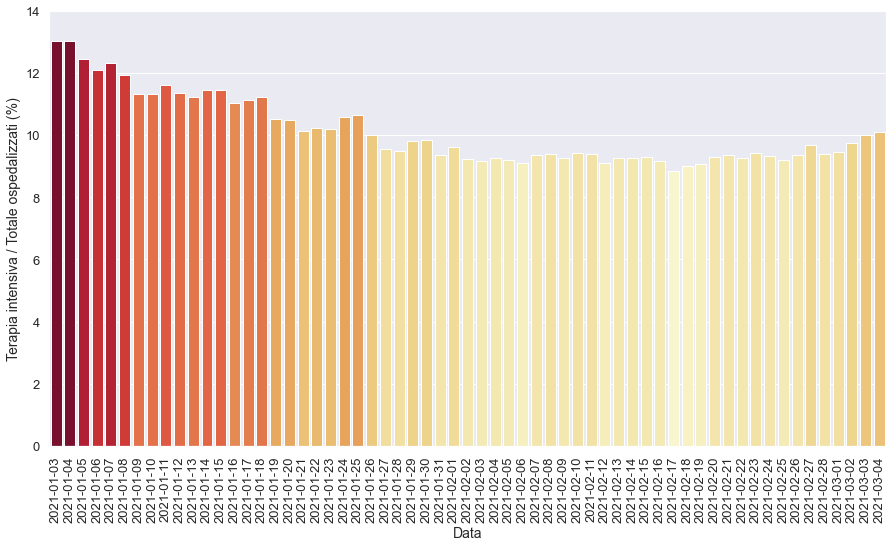

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

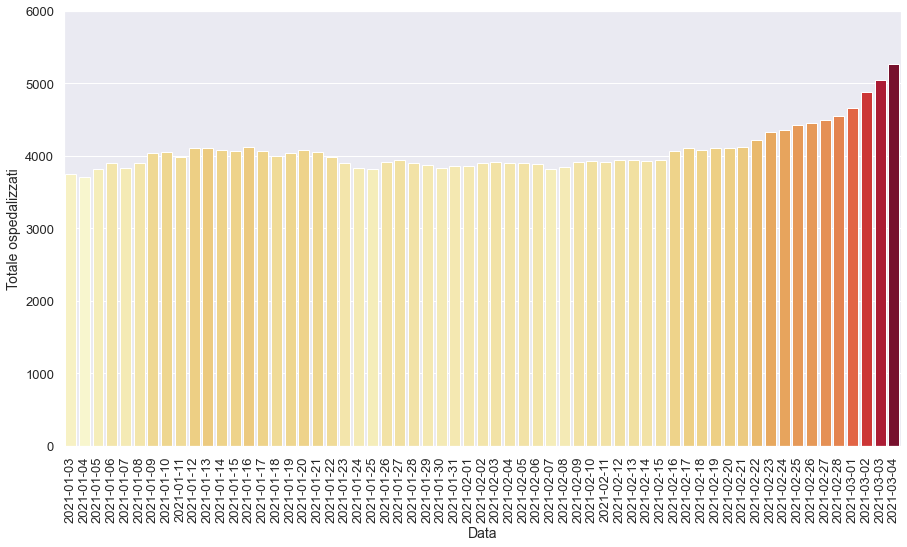

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

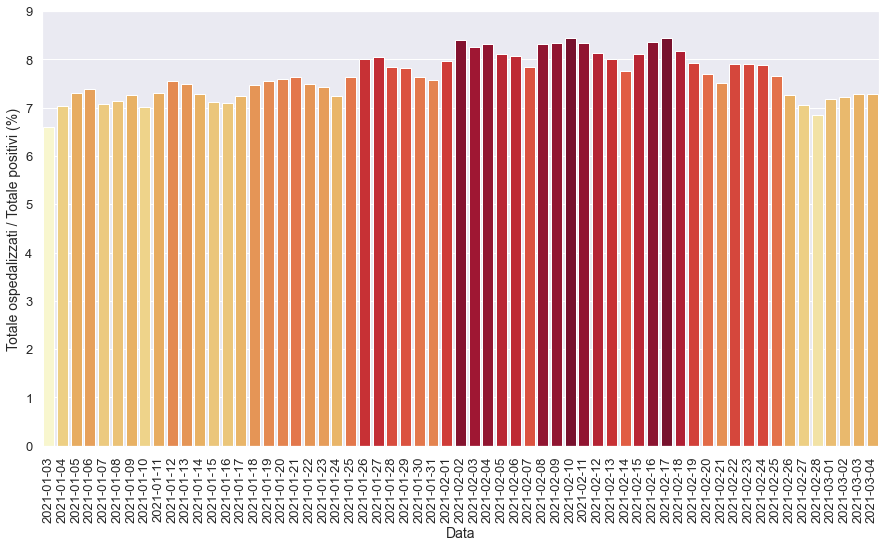

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

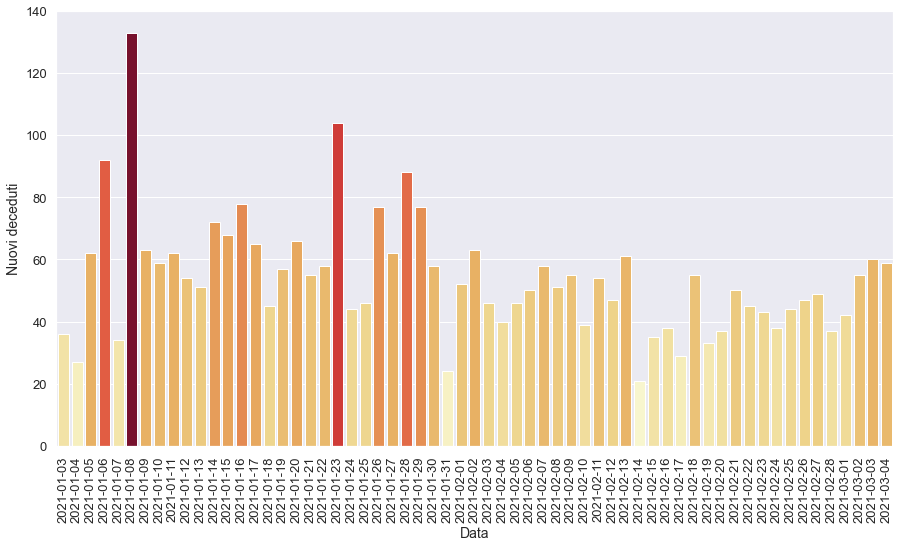

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

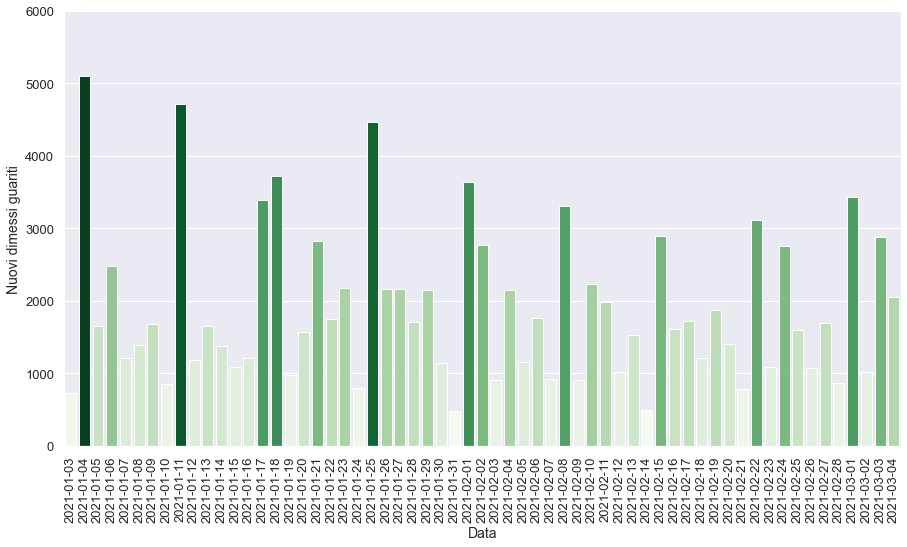

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,3,Lombardia,3544,361,3905,42654,46559,-1916,912,...,63.0,22699.0,4512.0,-1961.0,9.24,8.39,4.02,20.21,-2.70,-3.95
1,2021-02-03T17:00:00,3,Lombardia,3554,359,3913,43432,47345,786,1738,...,46.0,38651.0,9649.0,778.0,9.17,8.26,4.50,18.01,-0.55,1.69
2,2021-02-04T17:00:00,3,Lombardia,3539,362,3901,42995,46896,-449,1746,...,40.0,33047.0,8882.0,-437.0,9.28,8.32,5.28,19.66,0.84,-0.95
3,2021-02-05T17:00:00,3,Lombardia,3549,359,3908,44294,48202,1306,2504,...,46.0,39003.0,11311.0,1299.0,9.19,8.11,6.42,22.14,-0.83,2.78
4,2021-02-06T17:00:00,3,Lombardia,3540,354,3894,44415,48309,107,1923,...,50.0,36092.0,8767.0,121.0,9.09,8.06,5.33,21.93,-1.39,0.22
5,2021-02-07T17:00:00,3,Lombardia,3467,358,3825,45015,48840,531,1515,...,58.0,27624.0,8599.0,600.0,9.36,7.83,5.48,17.62,1.13,1.10
6,2021-02-08T17:00:00,3,Lombardia,3491,362,3853,42521,46374,-2466,895,...,51.0,13920.0,4842.0,-2494.0,9.40,8.31,6.43,18.48,1.12,-5.05
7,2021-02-09T17:00:00,3,Lombardia,3553,363,3916,43123,47039,665,1625,...,55.0,29479.0,7061.0,602.0,9.27,8.33,5.51,23.01,0.28,1.43
8,2021-02-10T17:00:00,3,Lombardia,3564,371,3935,42676,46611,-428,1849,...,39.0,36317.0,8954.0,-447.0,9.43,8.44,5.09,20.65,2.20,-0.91
9,2021-02-11T17:00:00,3,Lombardia,3550,368,3918,43092,47010,399,2434,...,54.0,41935.0,11875.0,416.0,9.39,8.33,5.80,20.50,-0.81,0.86


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

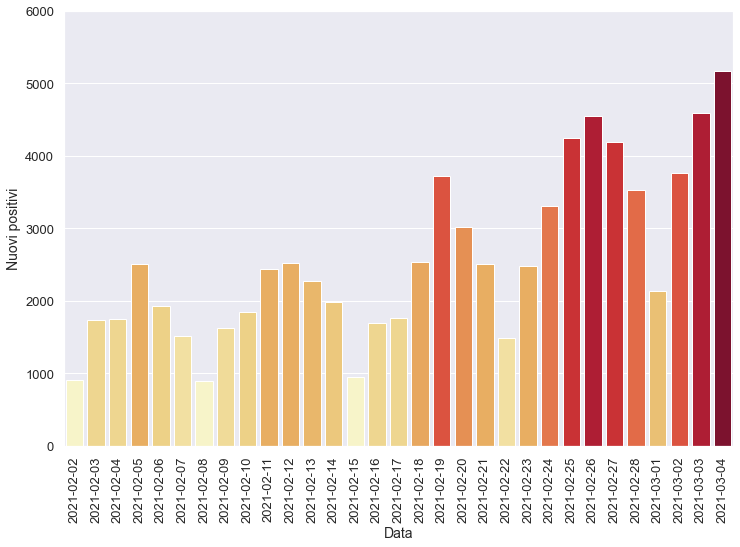

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

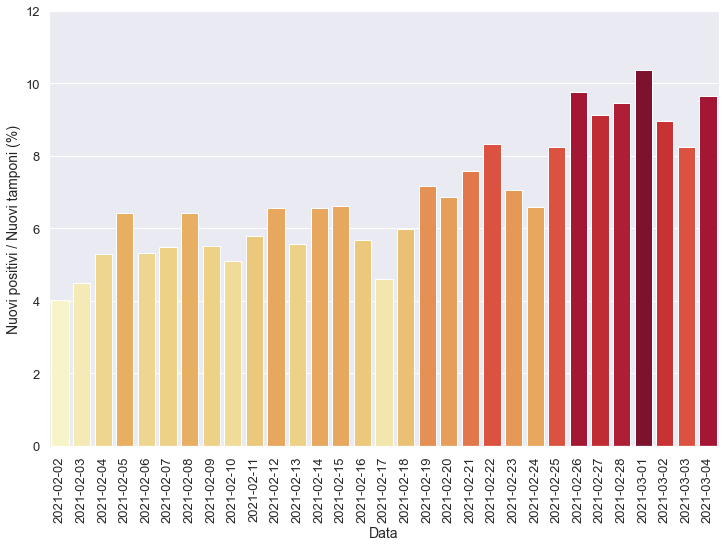

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

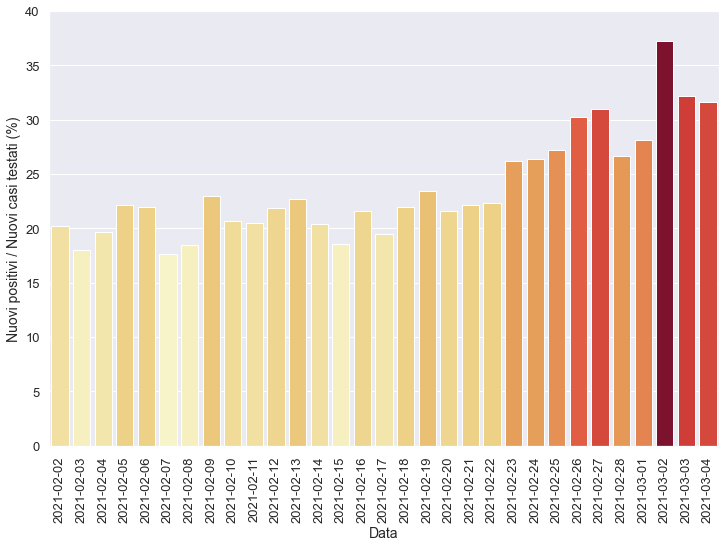

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

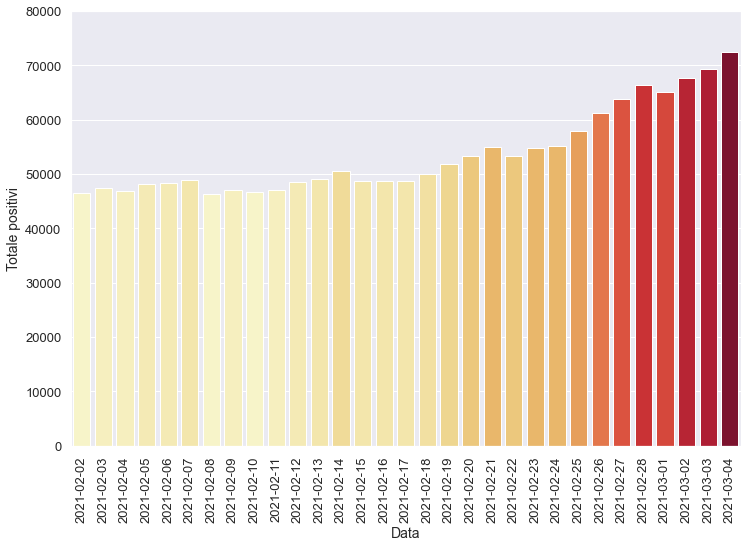

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

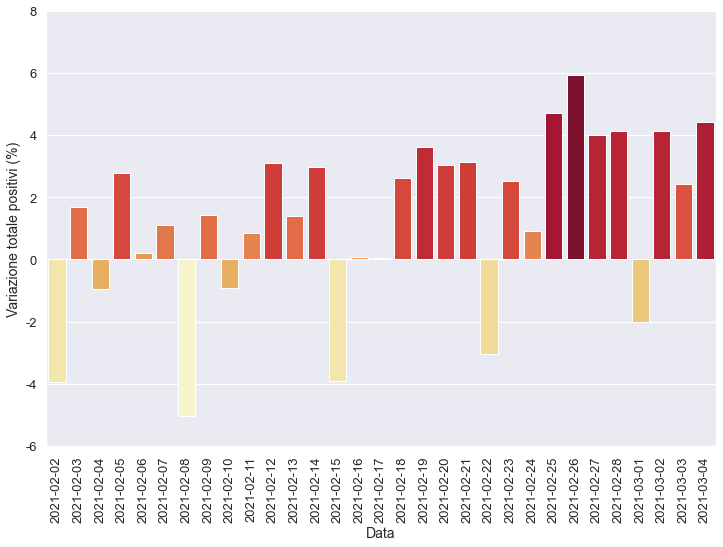

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

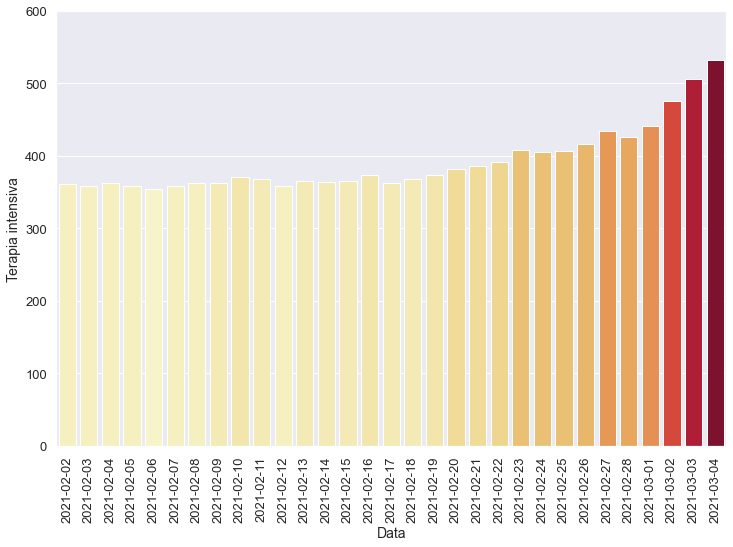

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

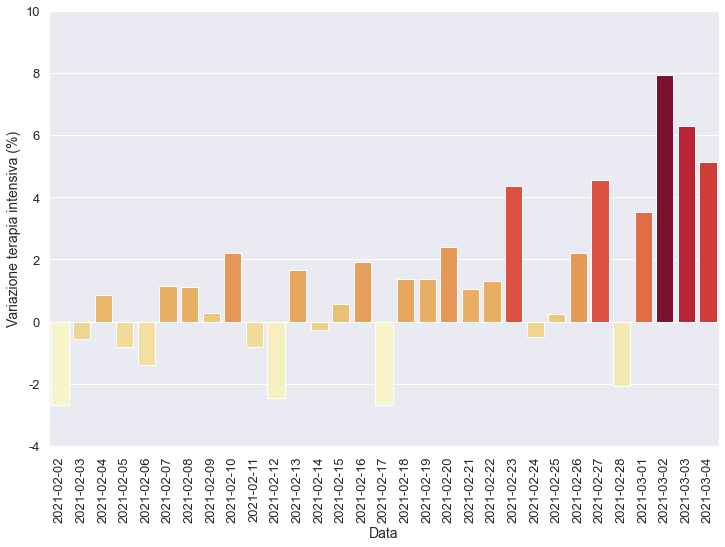

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

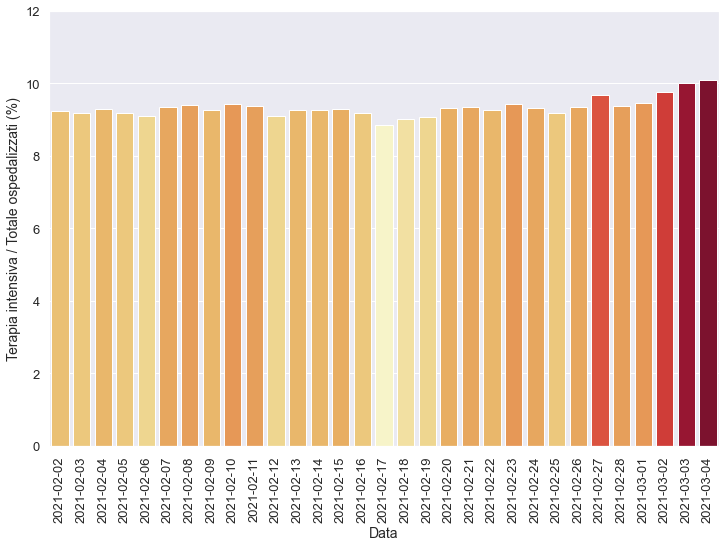

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

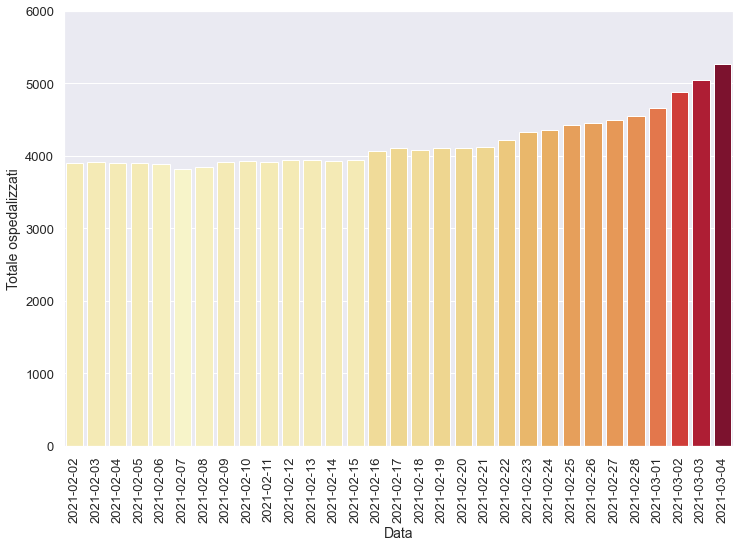

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

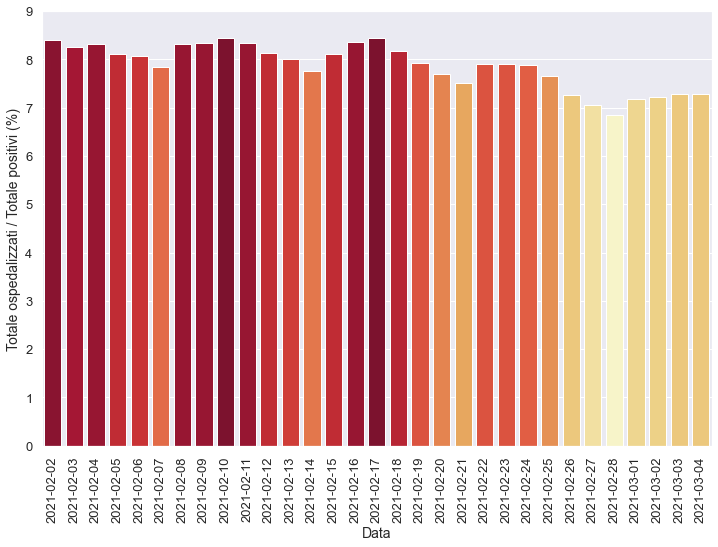

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

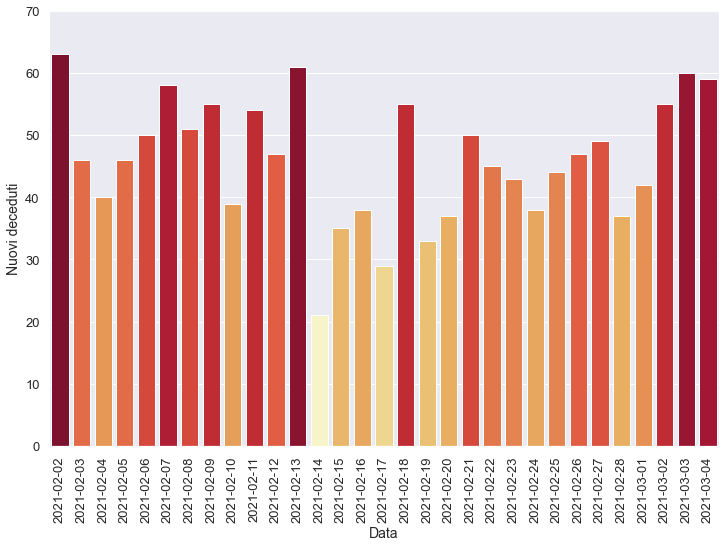

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

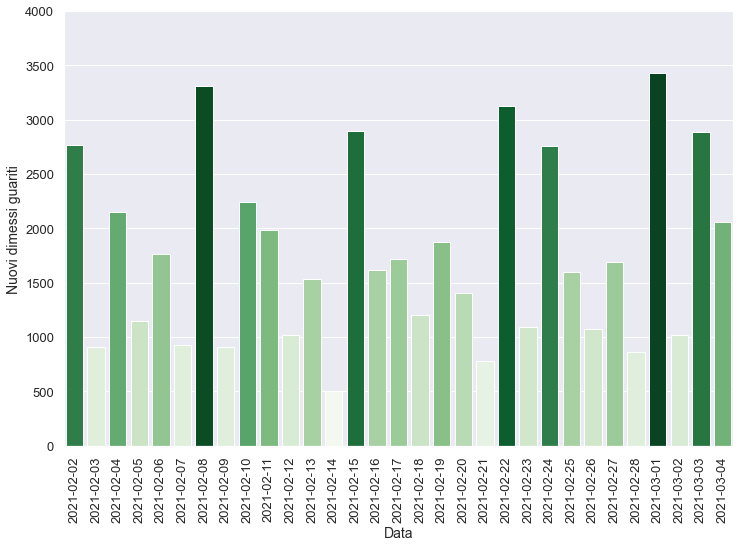

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,3,Lombardia,4024,407,4431,53397,57828,2603,4243,...,44.0,51473.0,15576.0,2524.0,9.19,7.66,8.24,27.24,0.25,4.71
1,2021-02-26T17:00:00,3,Lombardia,4034,416,4450,56817,61267,3439,4557,...,47.0,46725.0,15061.0,3420.0,9.35,7.26,9.75,30.26,2.21,5.95
2,2021-02-27T17:00:00,3,Lombardia,4062,435,4497,59217,63714,2447,4191,...,49.0,45865.0,13513.0,2400.0,9.67,7.06,9.14,31.01,4.57,3.99
3,2021-02-28T17:00:00,3,Lombardia,4118,426,4544,61797,66341,2627,3529,...,37.0,37251.0,13253.0,2580.0,9.38,6.85,9.47,26.63,-2.07,4.12
4,2021-03-01T17:00:00,3,Lombardia,4224,441,4665,60337,65002,-1339,2135,...,42.0,20571.0,7581.0,-1460.0,9.45,7.18,10.38,28.16,3.52,-2.02
5,2021-03-02T17:00:00,3,Lombardia,4408,476,4884,62806,67690,2688,3762,...,55.0,42052.0,10113.0,2469.0,9.75,7.22,8.95,37.20,7.94,4.14
6,2021-03-03T17:00:00,3,Lombardia,4545,506,5051,64285,69336,1646,4590,...,60.0,55611.0,14251.0,1479.0,10.02,7.28,8.25,32.21,6.30,2.43
7,2021-03-04T17:00:00,3,Lombardia,4735,532,5267,67127,72394,3058,5174,...,59.0,53563.0,16372.0,2842.0,10.10,7.28,9.66,31.60,5.14,4.41


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

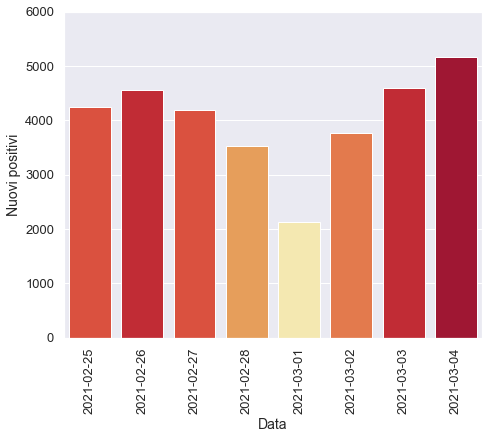

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

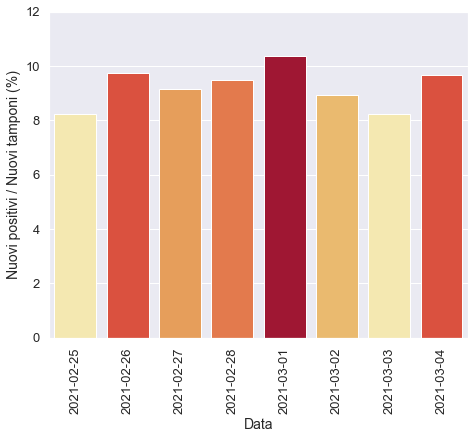

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

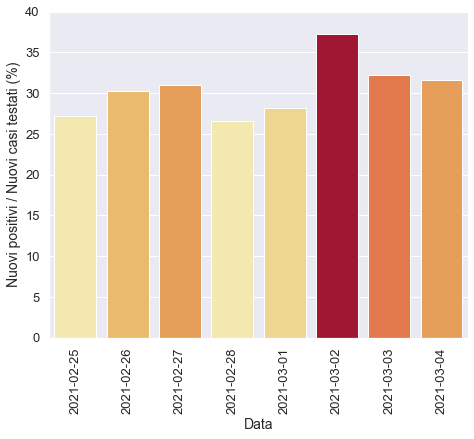

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

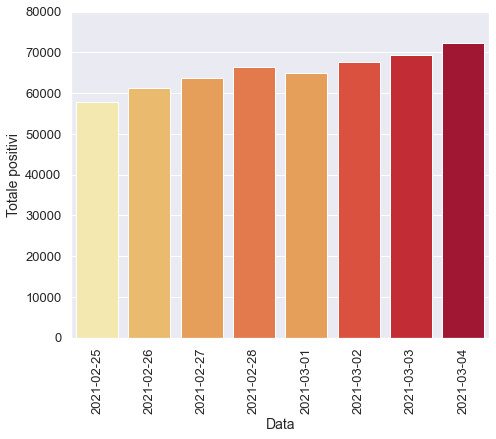

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

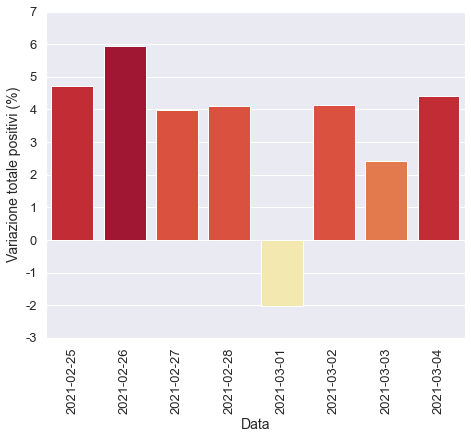

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

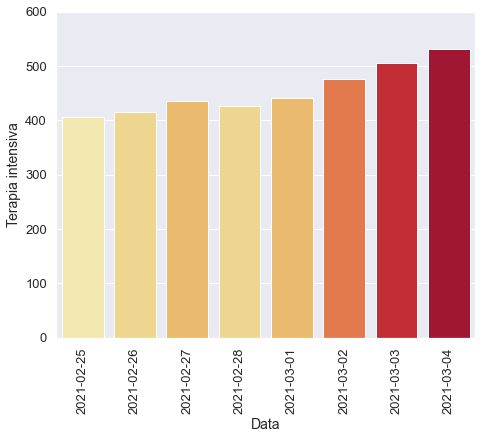

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

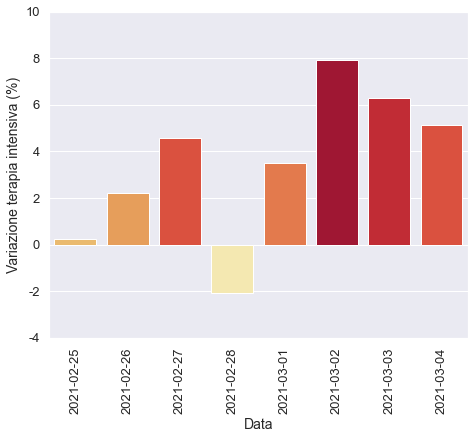

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

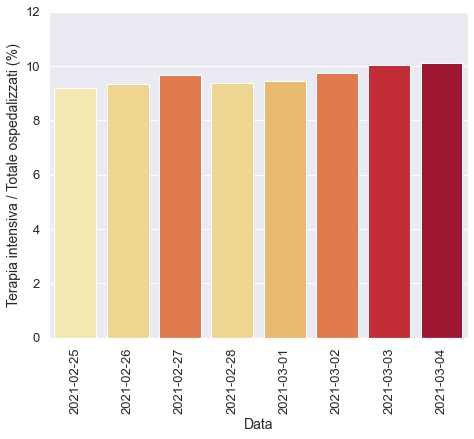

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

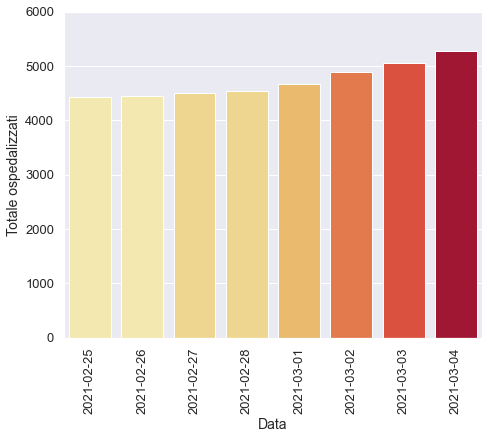

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

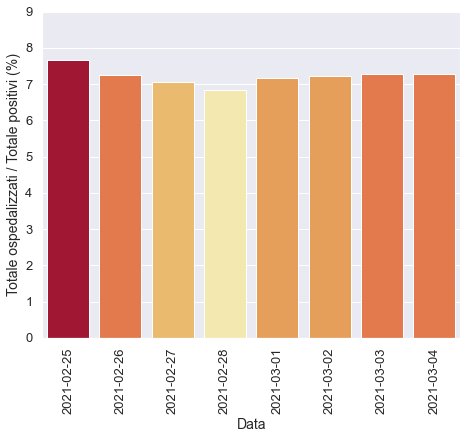

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

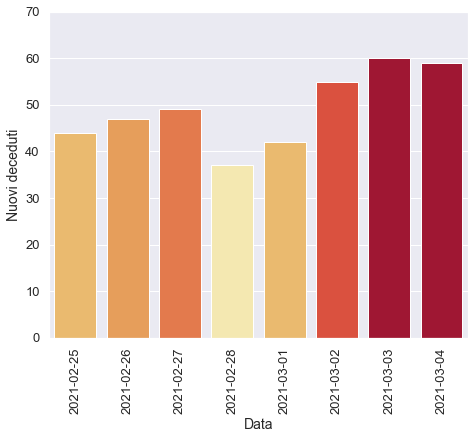

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

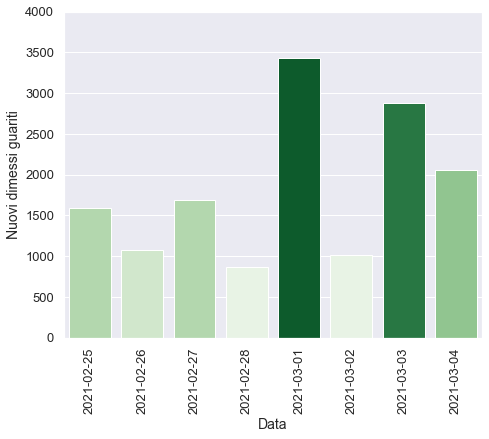

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)